In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data_loc = 'Dataset/Mess/mess_time_data.csv'

## ***Loading our Mess Time Data and Showing few columns of it***

In [2]:
# Load the CSV data into a DataFrame
data = pd.read_csv(data_loc)

# Display the first few rows of the DataFrame to get a sense of the data
data.head(10)

,Day,Time,Rush,Category,Friends,Holiday,Weather,TimeSpent
0,Monday,08:30,No,Breakfast,Without Friends,No,Not Rainy,13
1,Monday,12:30,No,Lunch,Without Friends,No,Not Rainy,25
2,Monday,17:40,Yes,Snacks,Without Friends,No,Not Rainy,15
3,Monday,19:50,No,Dinner,With Friends,No,Not Rainy,33
4,Tuesday,08:05,No,Breakfast,With Friends,No,Not Rainy,28
5,Tuesday,13:55,Yes,Lunch,With Friends,No,Not Rainy,40
6,Tuesday,17:41,Yes,Snacks,With Friends,No,Not Rainy,31
7,Tuesday,19:33,No,Dinner,With Friends,No,Not Rainy,30
8,Wednesday,09:00,No,Breakfast,Without Friends,No,Rainy,34
9,Wednesday,12:30,No,Lunch,Without Friends,No,Rainy,49


## ***Check data types and missing values***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Day        56 non-null     object
 1   Time       56 non-null     object
 2   Rush       56 non-null     object
 3   Category   56 non-null     object
 4   Friends    56 non-null     object
 5   Holiday    56 non-null     object
 6   Weather    56 non-null     object
 7   TimeSpent  56 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 3.6+ KB


## ***Summary statistics of numeric columns***

In [4]:
data.describe()

,TimeSpent
count,56.000000
mean,30.482143
std,13.662146
min,13.000000
25%,21.750000
50%,28.500000
75%,33.250000
max,85.000000


## ***Visualize the distribution of TimeSpent***

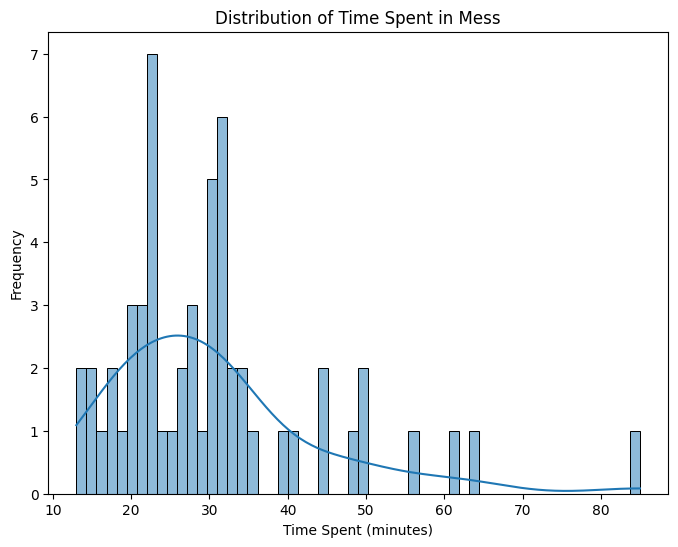

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(data['TimeSpent'], bins=56, kde=True)
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent in Mess')
plt.show()

## ***Explore the distribution of TimeSpent by different columns using boxplot***

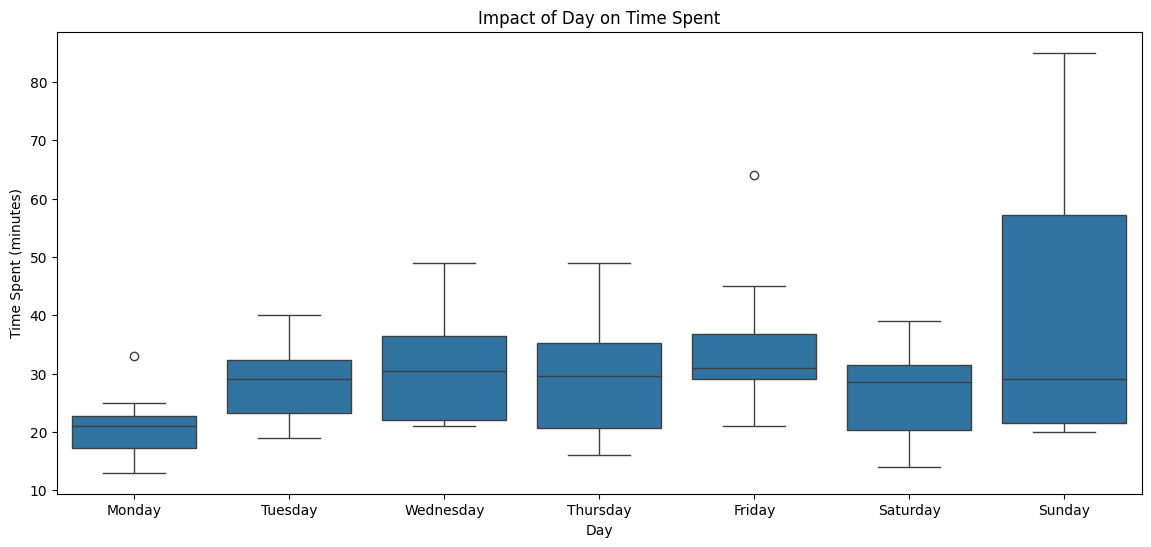

/tmp/ipykernel_45481/1718113796.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


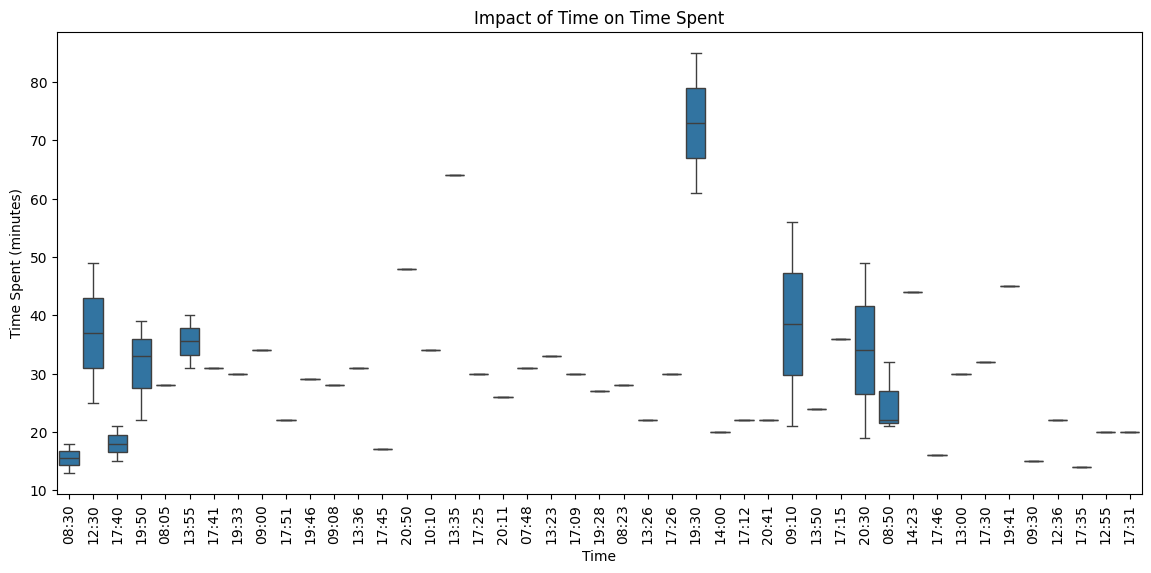

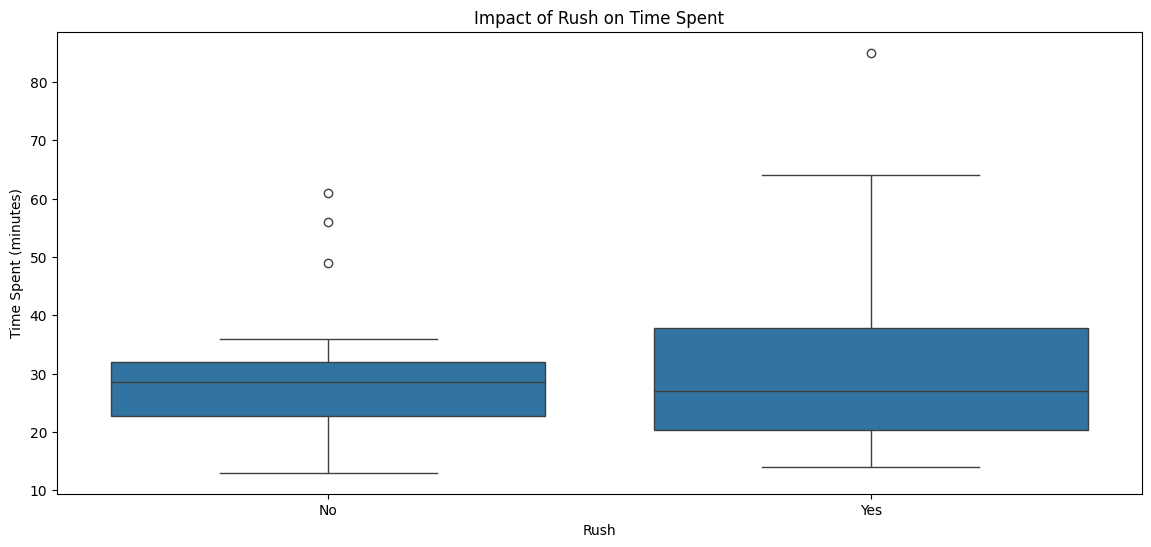

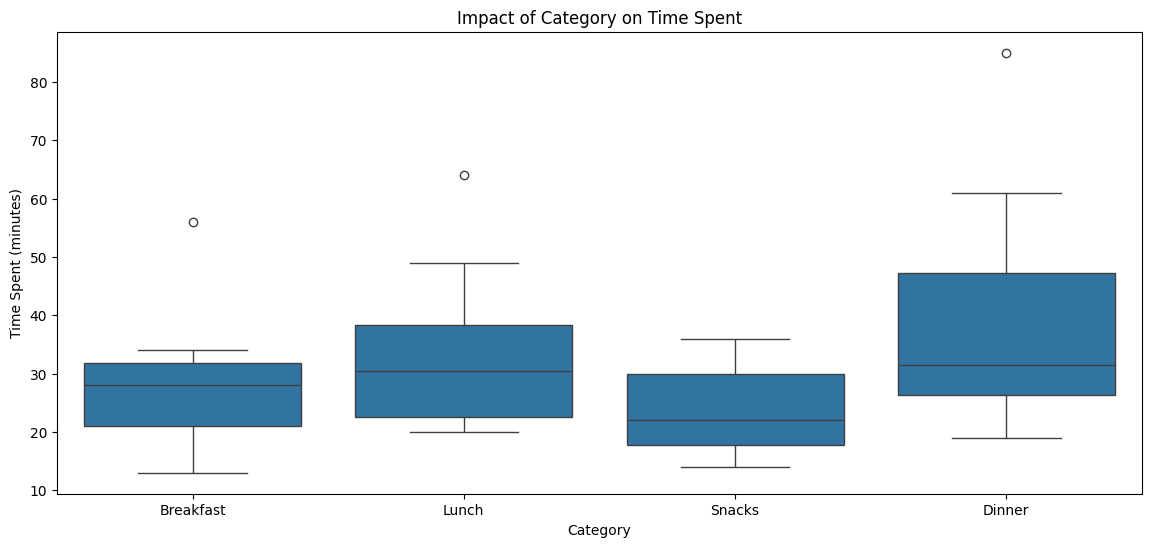

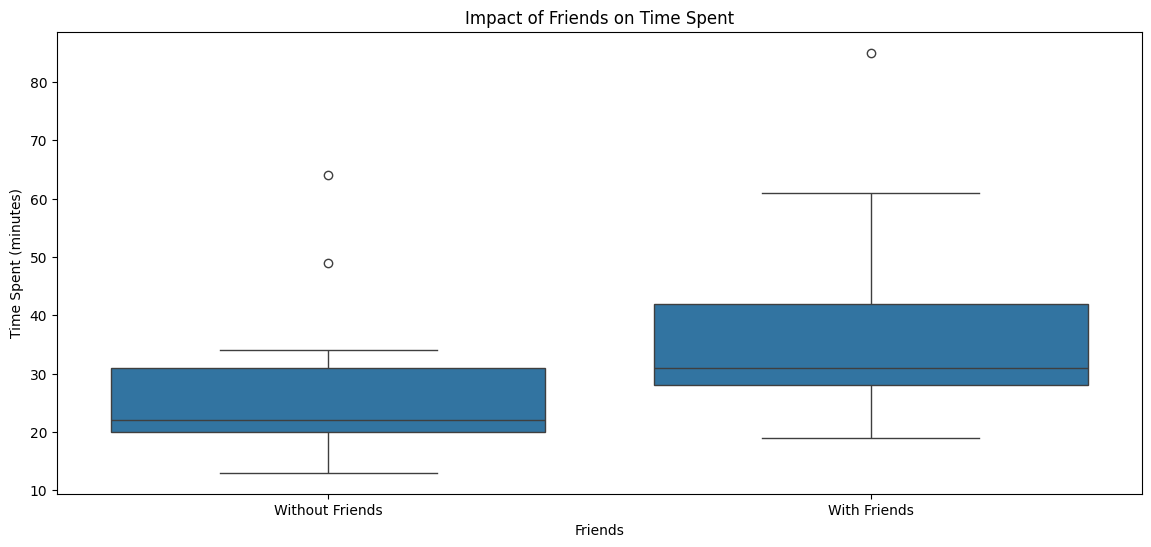

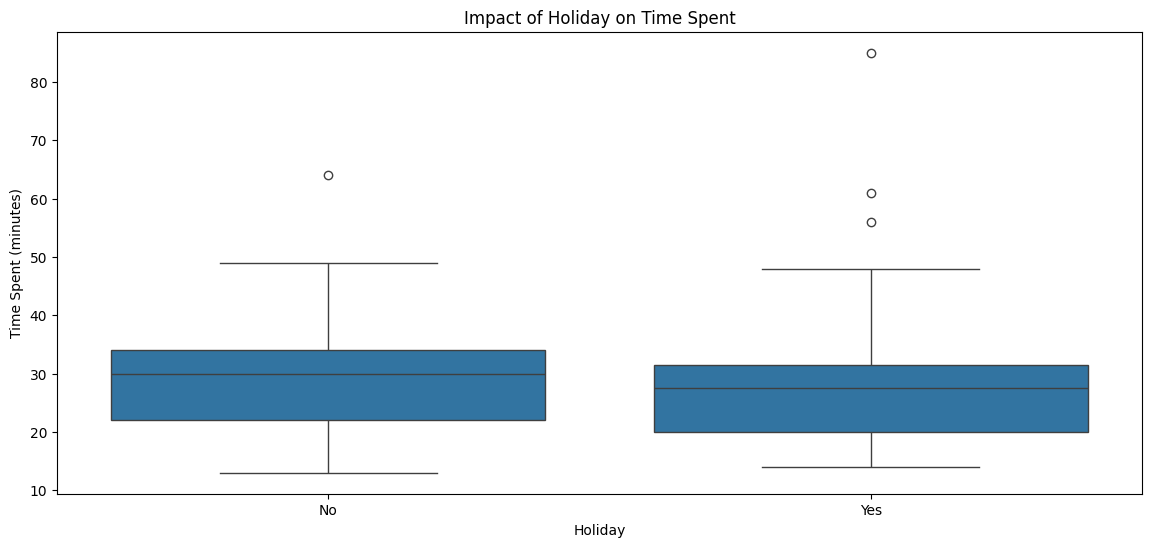

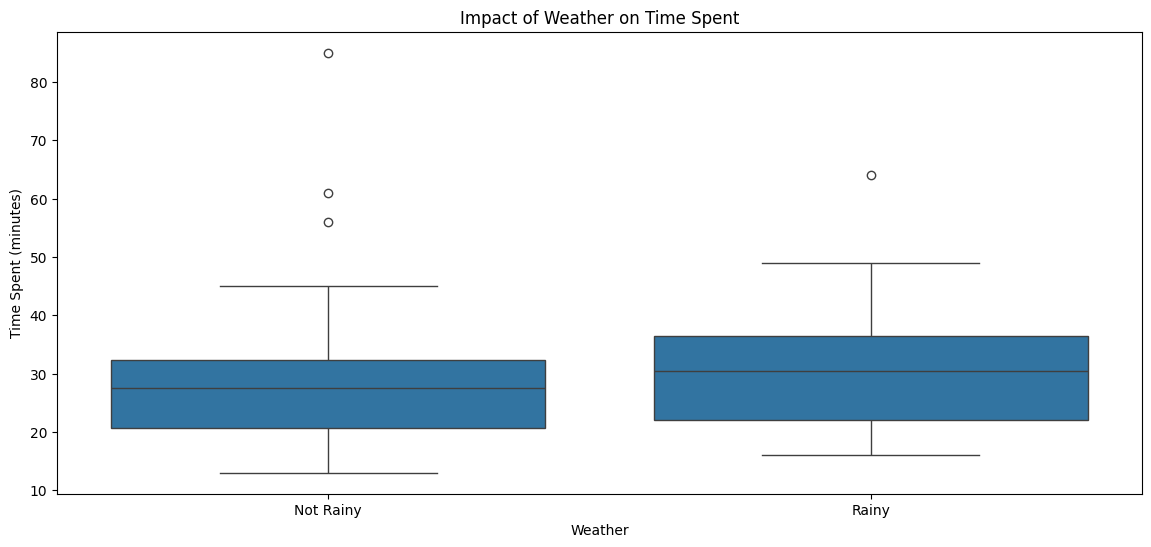

In [6]:
# Loop through each column in the DataFrame and create a boxplot
for col in data.columns:
    if col != 'TimeSpent':
        plt.figure(figsize=(14, 6))
        ax = sns.boxplot(x=col, y='TimeSpent', data=data)
        if col == 'Time':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.xlabel(col)
        plt.ylabel('Time Spent (minutes)')
        plt.title(f'Impact of {col} on Time Spent')
        plt.show()

## ***Creating bar plots to visualize categorical variables.***

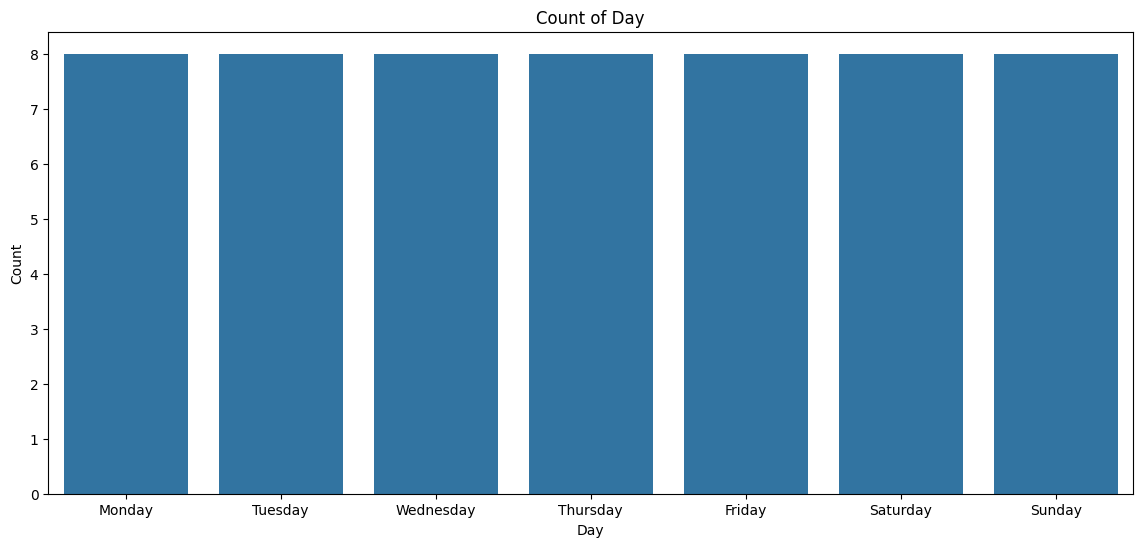

/tmp/ipykernel_45481/2823910594.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


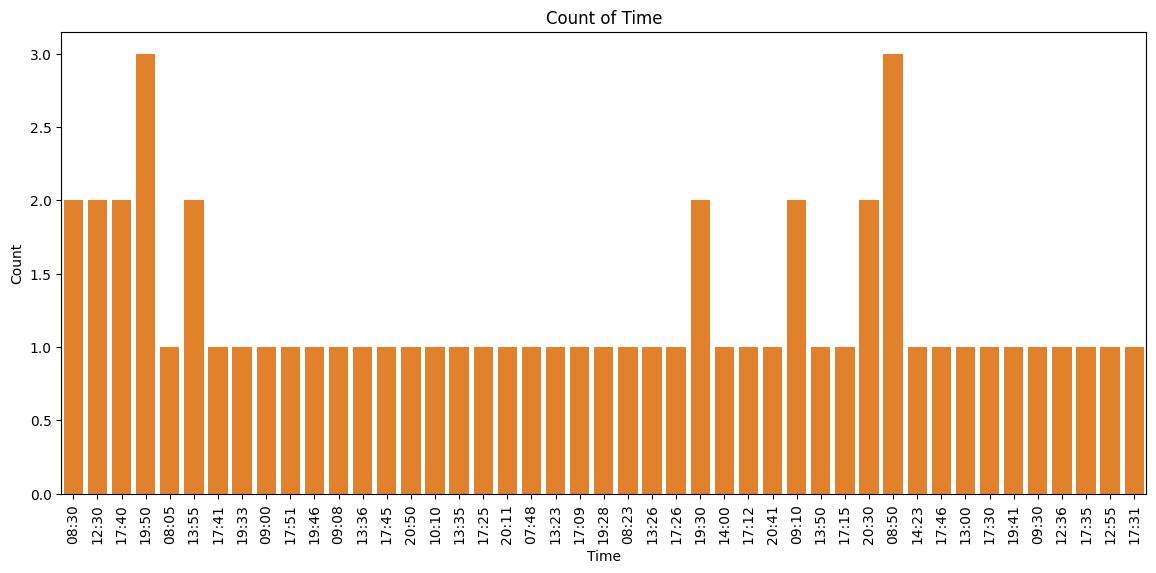

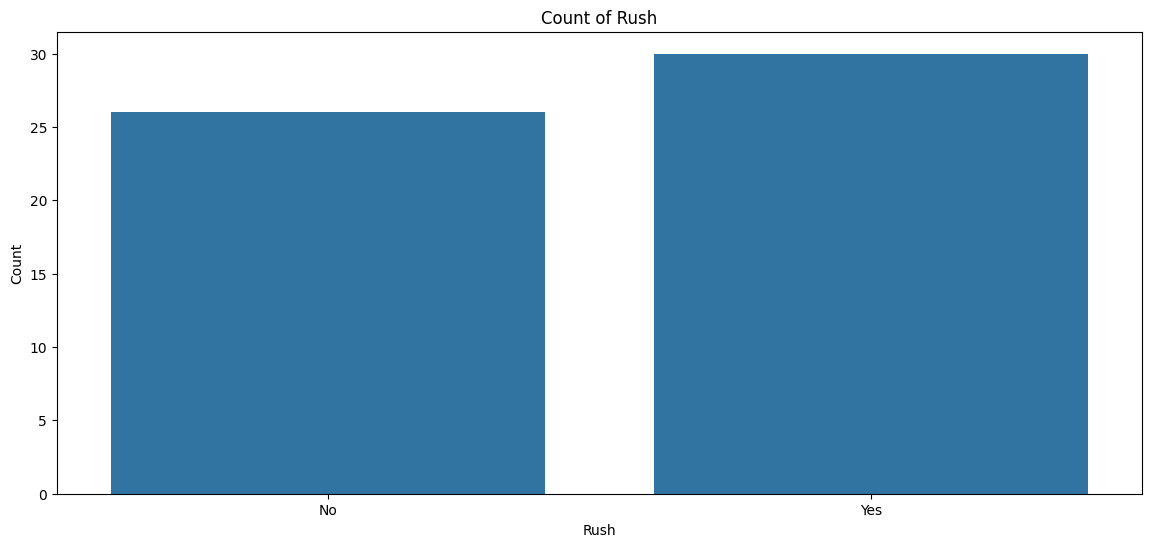

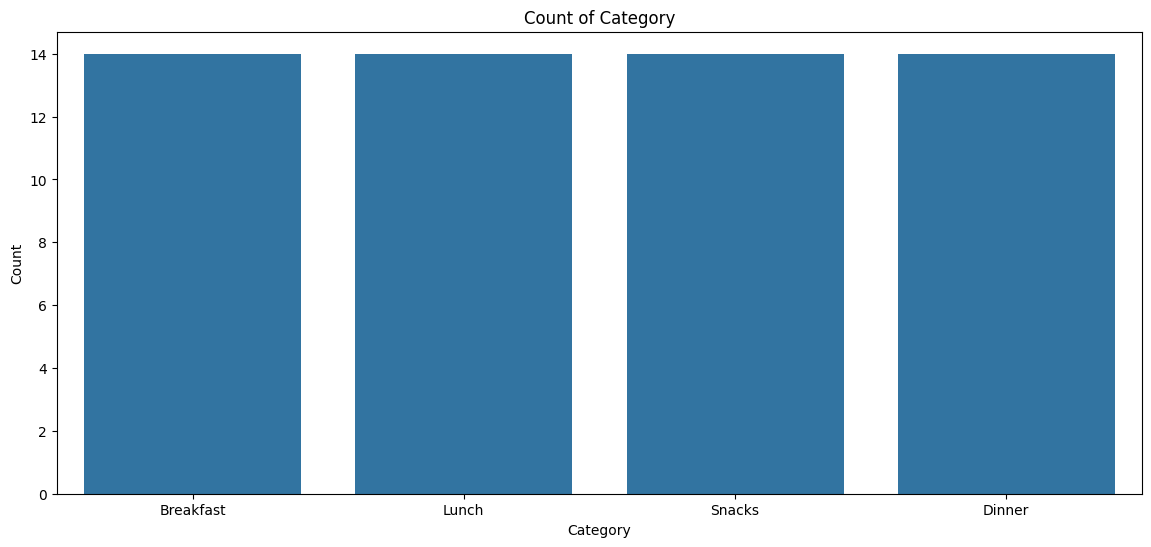

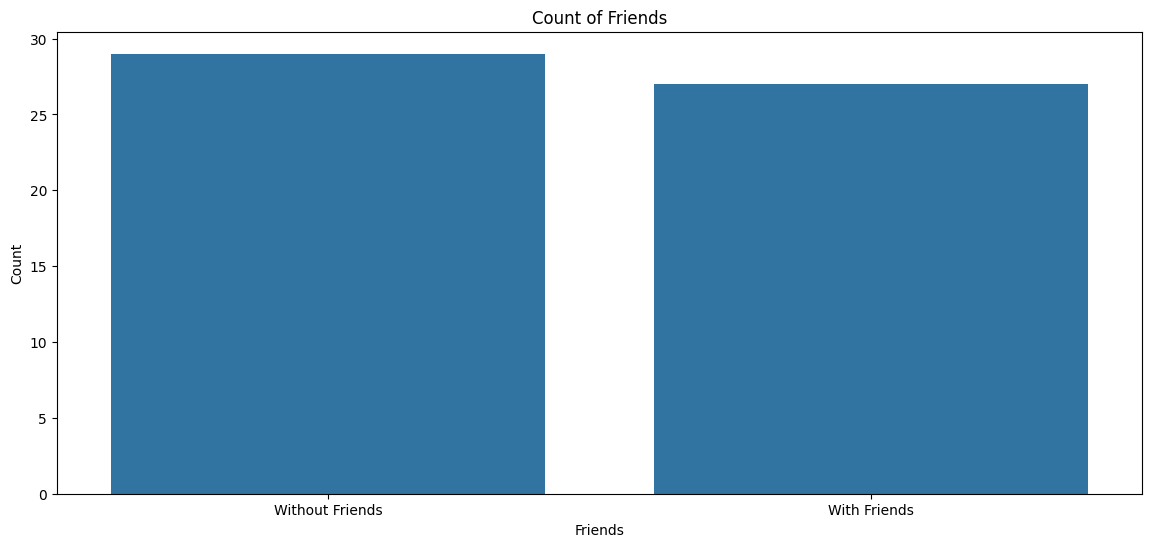

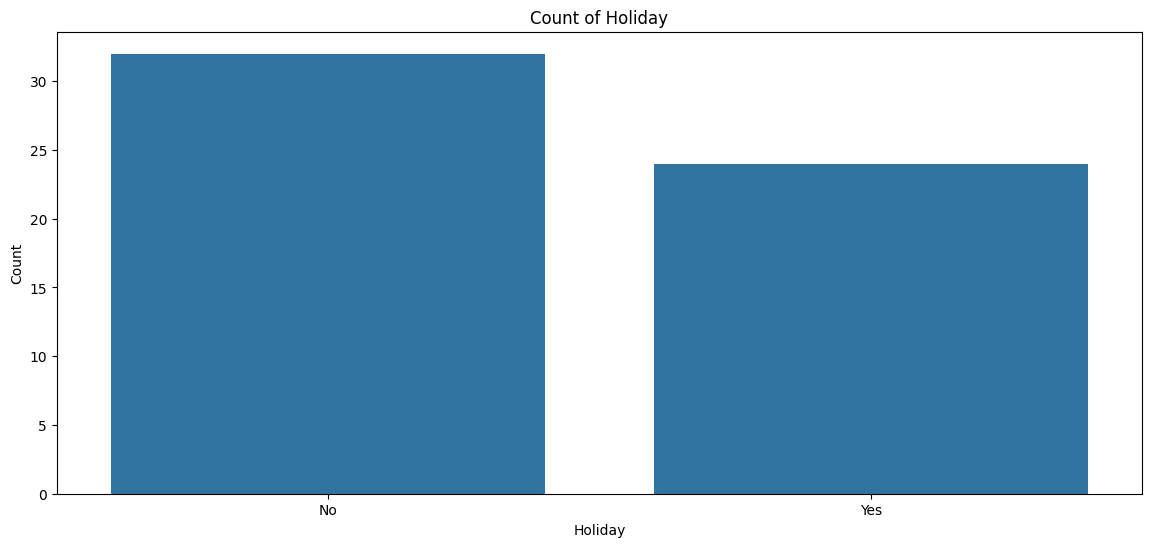

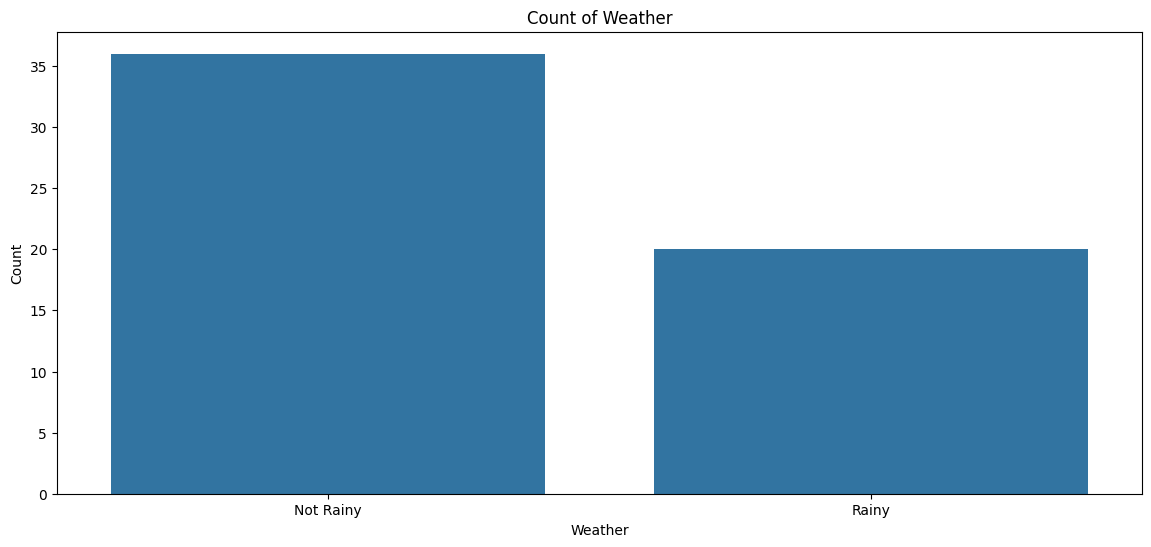

In [7]:
# Loop through each column in the DataFrame and create a countplot
for col in data.columns:
    if col != 'TimeSpent':
        plt.figure(figsize=(14, 6))
        ax = sns.countplot(x=col, data=data)
        if col == 'Time':
            time_order = sorted(data['Time'].unique())
            ax = sns.countplot(x=col, data=data,order=time_order)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'Count of {col}')
        plt.show()

## ***Plot of the average time taken against different days for each of meal type***

<Figure size 1400x800 with 0 Axes>

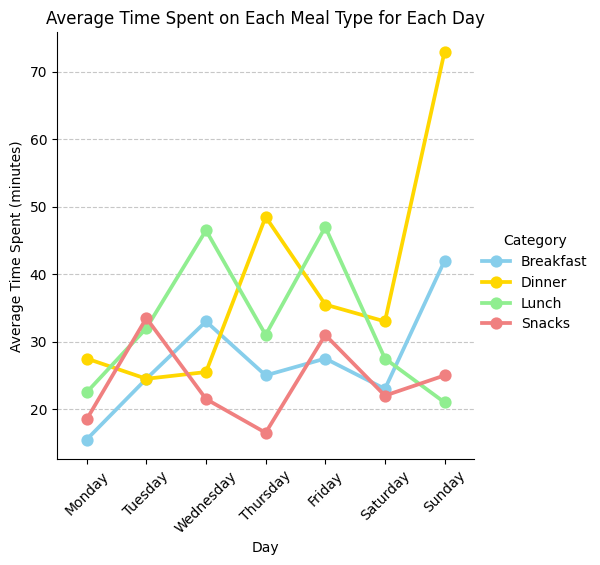

In [8]:
# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by 'Day' and 'Category' and calculate the mean time spent
day_category_time = data.groupby(['Day', 'Category'])['TimeSpent'].mean().reset_index()

# Define colors for different meal types
colors = {'Breakfast': 'skyblue', 'Lunch': 'lightgreen', 'Snacks': 'lightcoral', 'Dinner': 'gold'}

# Create a single plot of the time taken against different days for each meal type
plt.figure(figsize=(14, 8))
sns.catplot(x='Day', y='TimeSpent', hue='Category', data=day_category_time, kind='point', order=day_order,palette=colors)
plt.xlabel('Day')
plt.ylabel('Average Time Spent (minutes)')
plt.title('Average Time Spent on Each Meal Type for Each Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ***Average time spent on different days***

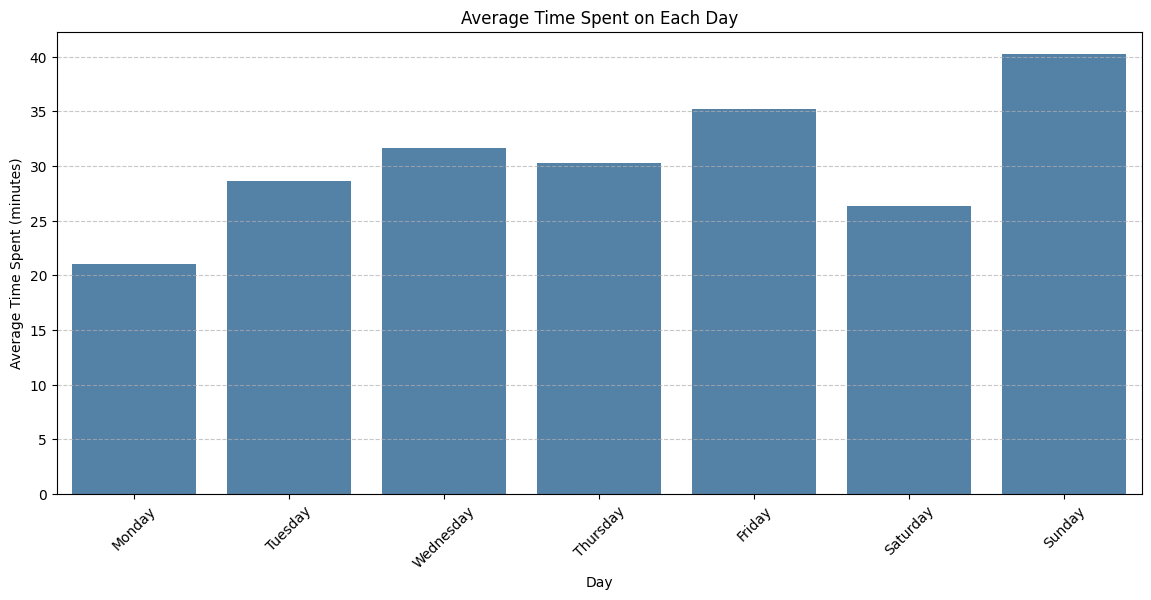

In [9]:
# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a plot of the average time spent on each day
day_time = data.groupby('Day')['TimeSpent'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x='Day', y='TimeSpent', data=day_time, order=day_order, color='steelblue')
plt.xlabel('Day')
plt.ylabel('Average Time Spent (minutes)')
plt.title('Average Time Spent on Each Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ***EXPLORATORY DATA ANALYSIS ENDS HERE***

# ***NOW FINDING MODEL TO FIT THE DATA***

## ***Again plotting KDE Plot of TimeSpent***

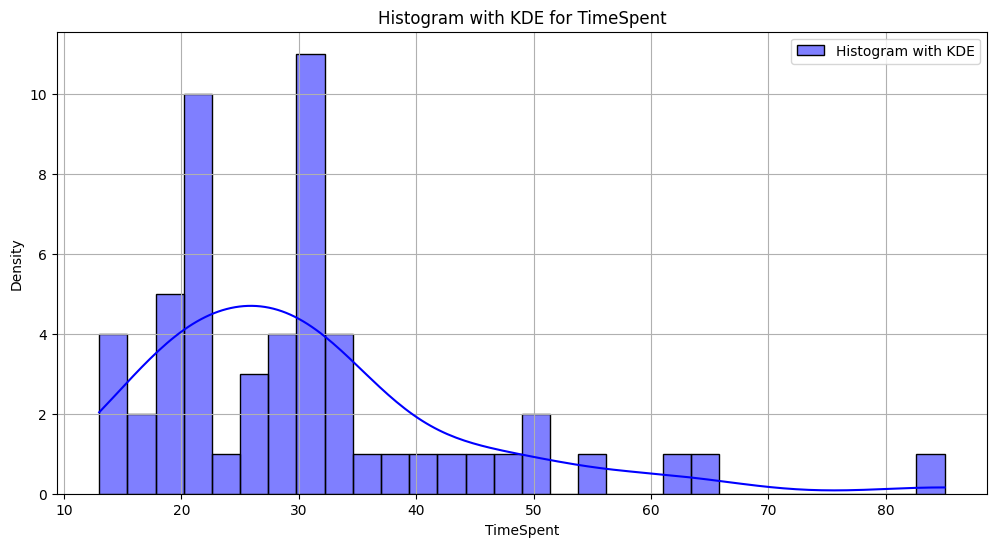

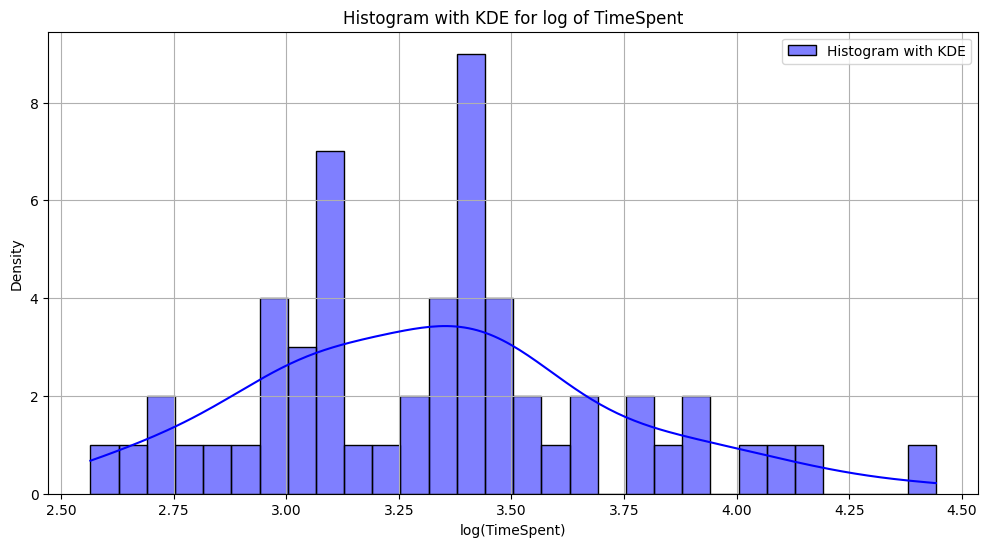

In [10]:
# Load the CSV data into a DataFrame
df = pd.read_csv(data_loc)

# Extract the 'TimeSpent' column from the DataFrame
time_spent = df['TimeSpent']

# Create a histplot with KDE overlaid
plt.figure(figsize=(12, 6))
sns.histplot(time_spent, kde=True, color='b', bins=30, label='Histogram with KDE')

# Add labels and a legend
plt.xlabel('TimeSpent')
plt.ylabel('Density')
plt.title('Histogram with KDE for TimeSpent')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Create a histplot with KDE overlaid
plt.figure(figsize=(12, 6))
sns.histplot(np.log(time_spent), kde=True, color='b', bins=30, label='Histogram with KDE')

# Add labels and a legend
plt.xlabel('log(TimeSpent)')
plt.ylabel('Density')
plt.title('Histogram with KDE for log of TimeSpent')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### ***Due to the nature of the output of our data, our data can take only real positive values or real positive integers (integer because in our data, we have assumed it as number of minutes spent while having meals). So we can fit a logNormal distribution to our data and learn its parameters as logNormal distributions are bound by zero and thus cannot take negative values. We can also see KDE plot of TimeSpent which can be approximated as logNormal distribution. Taking log of the values of TimeSpent and plotting it also shows us that log of TimeSpent can be approximated as Normal Distribution. Hence, we can fit our data to a logNormal Distribution. We can also fit our data into poisson distribution assuming time spent as count of minutes spent while having meal because time spent or count of minutes can not take negative values and poisson distribution too can not take negative values. Hence it is also suitable to model/fit our data apart from logNormal distribution. Here we have coded and learnt the parameter assuming Poisson distribution of data as it was discussed in class.***

## ***Data Pre-processing for feeding it in model***

In [11]:
# Load the CSV data into a DataFrame
data = pd.read_csv(data_loc)

data = pd.get_dummies(data, columns=['Day'], drop_first=True)

# Drop the 'Time' column because Rush is giving information about the time
data = data.drop('Time', axis=1)

# Binary encode 'Rush' column
data['Rush'] = data['Rush'].apply(lambda x: 1 if x == 'Yes' else 0)

# Get dummy variables for 'Category' column
data = pd.get_dummies(data, columns=['Category'], drop_first=True)

# Binary encode 'Friends' column
data['Friends'] = data['Friends'].apply(lambda x: 1 if x == 'With Friends' else 0)

# Binary encode 'Holiday' column
data['Holiday'] = data['Holiday'].apply(lambda x: 1 if x == 'Yes' else 0)

# Binary encode 'Weather' column
data['Weather'] = data['Weather'].apply(lambda x: 1 if x == 'Rainy' else 0)

# Display the first few rows of the Processed DataFrame to get a sense of the pre processed data
data.head()

,Rush,Friends,Holiday,Weather,TimeSpent,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Category_Dinner,Category_Lunch,Category_Snacks
0,0,0,0,0,13,True,False,False,False,False,False,False,False,False
1,0,0,0,0,25,True,False,False,False,False,False,False,True,False
2,1,0,0,0,15,True,False,False,False,False,False,False,False,True
3,0,1,0,0,33,True,False,False,False,False,False,True,False,False
4,0,1,0,0,28,False,False,False,False,True,False,False,False,False


## ***Separating Predictor and Target Variable. Adding column of ones at starting of matrix X for bias term***

In [12]:
X = np.array(data.drop('TimeSpent', axis=1))
X = np.hstack((np.ones((X.shape[0], 1)), X))

Y = np.array(data['TimeSpent']).reshape((len(data['TimeSpent']), 1))

print(X.shape)
print(Y.shape)

(56, 14)
(56, 1)


## ***Train Test Split***

In [13]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(56, 14)
(56, 1)
(12, 14)
(12, 1)


### ***Initializing Parameter Matrix***

In [14]:
omega = np.ones(X_train.shape[1])
omega = omega.reshape(X_train.shape[1], 1)

## ***Estimating Parameter Using MLE. Using Gradient Descent to optimize likelihood function or estimator of my parameters/weights***

Likelihood function for Poisson distribution:

$L(\lambda; y) = \frac{e^{-\lambda} \lambda^y}{y!}$

Log-likelihood function for Poisson distribution:

$\log L(\lambda; y) = -\lambda + y \log(\lambda) - \log(y!)$

Derivative of log-likelihood function for Poisson distribution:

$\frac{d}{d\lambda} \log L(\lambda; y) = -1 + \frac{y}{\lambda}$

Update rule for gradient descent for Poisson distribution:

$\lambda = \lambda + \alpha (y - \lambda)$

where $\lambda$ is the parameter of the Poisson distribution, $y$ is the observed data, and $\alpha$ is the learning rate.

In [15]:
iteration = 1000000
learning_rate = 0.00001


arr = np.array(np.dot(X_train, omega), dtype=np.float32)
A = np.exp(arr)

for i in range(0, iteration):    
    J_partial_omega = np.dot(X_train.T, (A-Y_train))
    omega = omega - (learning_rate*J_partial_omega)
    arr = np.array(np.dot(X_train, omega), dtype=np.float32)
    A = np.exp(arr)

## ***Features and its weight / parameter values for features***

In [16]:
# Converting columns of our data into feature list
features = list(data.columns)
# Removing TimeSpent as it is target variable
features.remove('TimeSpent')
# Inserting Bias at starting of our feature list
features.insert(0,'Bias')

# Create a DataFrame to display features and its weight side by side
feat_wt = pd.DataFrame({'Features': features, 'Weight': omega.flatten()})
# Display the DataFrame
feat_wt
# Sorting by column 'Weight'
feat_wt.sort_values('Weight')

,Features,Weight
5,Day_Monday,-0.292427
13,Category_Snacks,-0.255443
8,Day_Thursday,-0.171086
9,Day_Tuesday,-0.118452
10,Day_Wednesday,-0.099075
6,Day_Saturday,-0.071119
3,Holiday,-0.059847
11,Category_Dinner,0.032452
1,Rush,0.120537
12,Category_Lunch,0.164769


### ***By the equation y_pred = np.exp(np.dot(X_test, omega)), we can conclude that greater the absolute value of omega, greater will be its impact on deciding target and lesser the absolute value of omega means lesser impact on target variable. Also negative value of parameter means that feature will try to minimize the count/time and positive value means that feature will try to maximize the count/time.***

### ***Looking at the sorted order of our weights from top and bottom, we can conclude that values which are present at tops and bottoms are more important for prediction because of greater absolute values. This can be interpreted in this way too say Day_Monday has greater negative value and Day_Sunday has high positive value means if it is monday then probably time spent will be less and if it is sunday time spent will be high. Also value of weight/parameter of friends is highest means that being with or without friends is highly important factor to predict time spent in mess. All parameters around zero values whose absolute values are very less are not very important to predict the time spent. These things can be further quantified using t_statistics analysis to determine statistical significance.***

## ***Prediction on Test Data***

In [17]:
arr = np.array(np.dot(X_test, omega), dtype=np.float32)
y_pred = np.exp(arr)

# Create a DataFrame to display features and its weight side by side
result_df = pd.DataFrame({'y_test': list(Y_test), 'y_pred': list(y_pred)})
# Display the DataFrame
result_df

,y_test,y_pred
0,[30],[46.307922]
1,[24],[26.636953]
2,[22],[24.722242]
3,[30],[25.4703]
4,[29],[42.382206]
5,[15],[14.703882]
6,[21],[22.59052]
7,[49],[44.489548]
8,[32],[26.965662]
9,[22],[18.959219]


## ***Metric Used - MSE and R2_Score***

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error (MSE) - Poisson Regression: {mse}')
print(f'R-squared (R2) Score - Poisson Regression: {r2}')

Mean Squared Error (MSE) - Poisson Regression: 45.62477584136165
R-squared (R2) Score - Poisson Regression: 0.3121893089241963


## ***Fitting a Linear Regression Model***

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
X = data.drop('TimeSpent', axis=1)
y = data['TimeSpent']

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the MSE and R2 score
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 41.88101356950688
R-squared (R2) Score: 0.3686279361380873


## ***Visualizing the Actual and Predicted Values of Linear Regression and Poisson Regression***

In [20]:
# Create a DataFrame to display y_test and y_pred side by side
results_df = pd.DataFrame({'Actual': y_test, 'Linear Regression': y_pred, 'Poisson Regression': list(result_df['y_pred'])})

# Display the DataFrame
results_df

,Actual,Linear Regression,Poisson Regression
45,30,44.384019,[46.307922]
33,24,26.223263,[26.636953]
40,22,25.116540,[24.722242]
26,30,27.368251,[25.4703]
11,29,42.490773,[42.382206]
2,15,11.029993,[14.703882]
32,21,21.827161,[22.59052]
43,49,44.091046,[44.489548]
46,32,27.592520,[26.965662]
30,22,18.425950,[18.959219]


### ***Comparing the result (MSE and R2_Score) of linear regression and Poisson Regression we can see that both are giving equal performance in our case. To be more precise linear regression is doing better with given random state in code. When random state is changed, linear regression is failing miserably touching MSE upto 100 and 140 but MSE of Poisson Regression is not touching as high value as Linear Regression. So we can conclude that Poisson Regression is working better compared to Linear Regression. Also if there will be more data and it fits right in poisson distribution than poisson distribution will out perform linear regression that can be clearly interpreted and visualized.***